In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings

pd.set_option('display.max_rows', None)

In [2]:
root_path = Path('/Users/jiahaozhan/Desktop/data and scripts/Sivers_data')
fname = 'P10101_ByChip_Set2.csv'

data_dir = root_path / fname
df = pd.read_csv(data_dir)

print(df.columns)

Index(['Match Flag', 'Identity', 'Temp', 'Lot', 'Bar ID', 'Array ID',
       'Chip ID', 'Device Type', 'Pass/Fail Product', 'Pass/Fail Power',
       'Pass/Fail SMSR', 'Pass/Fail Channel Spacing from CH1', 'Vf @ 300mA',
       'Threshold If', 'Eff @ Ith + X', 'Eff @ 1–5mW', 'R @ Ith + X',
       'Power @ 300mA', 'Eff @ 300mA', 'Eff Ratio', 'R @ 300mA', 'Max Pwr',
       'Max Pwr @ I', 'Max Kink', 'Kink If', 'Ith (2 Seg)', 'Ith (1 Der)',
       'Ith (2 Der)', 'Ith (Lin)', 'Ith (2 Poly)', 'BF Power', 'Wave @ 100',
       'SMSR @ 100', 'Peak Power @ 100', '2nd Peak', 'Peak Separation',
       'Wave @ 200', 'SMSR @ 200', 'Peak Power @ 200', 'Wave Shift',
       'SMSR Delta', 'Wave @ 300', 'SMSR @ 300', 'Peak Power @ 300',
       'Wave Delta @ 100mA', 'Wave Delta @ 200mA', 'Wave Delta @ 300mA',
       'Channel Spacing(nm) @ 100mA', 'Channel Spacing(GHz) @ 100mA',
       'Spacing Delta (GHz) @ 100mA', 'Y1', 'Y2', 'Directory', 'Test Date',
       'Pad', 'Bar_Actual', 'User Calibration FF', 'C

In [5]:
print(df['Channel Spacing(GHz) @ 100mA'])

0             NaN
1      212.978288
2      219.538954
3      180.919855
4      180.633635
5      225.346018
6      209.359838
7      152.058389
8             NaN
9      195.619527
10     247.481038
11     189.652584
12     192.806339
13     169.971825
14     181.822231
15     178.080133
16            NaN
17     195.607587
18     221.375794
19     177.521727
20     201.531178
21     201.175844
22     207.733701
23     172.848716
24            NaN
25     160.589427
26     228.209075
27     172.203426
28     230.876129
29     152.555836
30     235.281374
31     188.259315
32            NaN
33     171.208887
34     212.741286
35     193.232503
36     210.253065
37     189.087675
38     181.858153
39     174.662042
40            NaN
41     180.026454
42     200.648004
43     189.863631
44     179.131131
45     161.510949
46     246.076105
47     166.118812
48            NaN
49     179.971501
50     170.979171
51     160.286068
52     239.924203
53     156.258116
54     239.093500
55     188

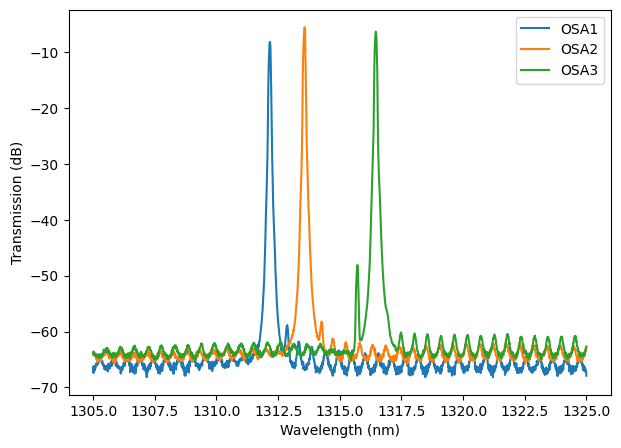

In [13]:
i = 3
id_l, id_u = (i-1)*2001, i*2001
dfb1 = df[id_l:id_u]
# plot spectrum
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dfb1['Wave'], dfb1['OSA1'], label=f'OSA{1}')
ax.plot(dfb1['Wave'], dfb1['OSA2'], label=f'OSA{2}')
ax.plot(dfb1['Wave'], dfb1['OSA3'], label=f'OSA{3}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()